In [ ]:
# Converting the classification supervised MNIST dataset to Unsupervised MNIST dataset 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold


In [ ]:
%matplotlib inline

In [ ]:
data = datasets.fetch_openml(
 'mnist_784', 
 version=1, 
 return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [ ]:
#single_image = single_image / 255
#np.squeeze(single_image, axis=1)
#pixel_values = pixel_values.astype('int')
#np_single_image = single_image.reshape(pixel_values.shape[1, :])

In [ ]:
#print(pixel_values)
#Manish - Need to understand difference btween dataframe and conversion to numpy
single_image = pixel_values.to_numpy()
#print('conversion to numpy', single_image)
#print('shape value', pixel_values.shape[0]) -> This is 70000 images of 28*28 size giving 784 datapoints
# reshape to be [samples][width][height][channels]
single_image = single_image.reshape(pixel_values.shape[0], 28, 28, 1).astype('float32')
#print(single_image)



In [ ]:

plt.imshow(single_image[2, :], cmap='gray')

In [91]:
# doing transformation

tsne = manifold.TSNE(n_components=2, random_state=42)
print(tsne)
#convert to numpy again
np_transform = pixel_values.to_numpy()
#transformed_data = tsne.fit_transform(pixel_values.values.reshape(pixel_values.shape[:3000, :])
transformed_data = tsne.fit_transform(np_transform[:3000, :])

TSNE(random_state=42)


In [92]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])), 
columns=["x", "y", "targets"]
)

In [93]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

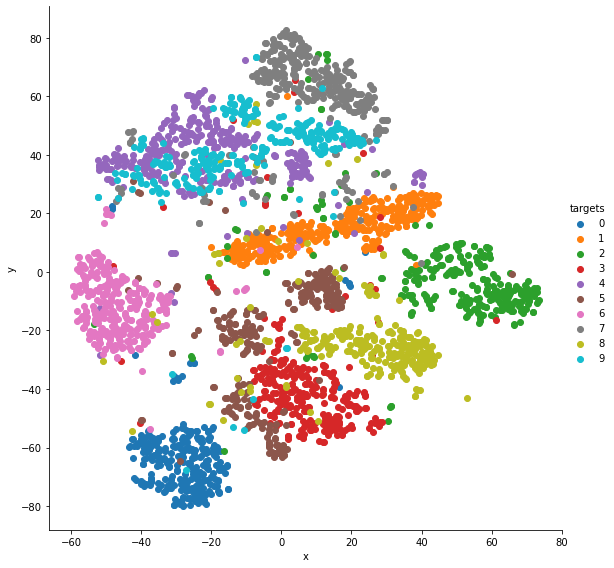

In [95]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()